In [13]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




In [ ]:

tickers = [
    "AAPL", "MSFT", "NVDA",   # Tech
    "JPM", "GS",              # Finance
    "XOM", "CVX",             # Énergie
    "JNJ", "PFE",             # Santé
    "AMZN", "PG",             # Conso
    "SPY"                     # Benchmark S&P500
]


In [ ]:

start = "2018-01-01"
end   = pd.Timestamp.today().strftime("%Y-%m-%d")

raw_data = yf.download(tickers, start=start, end=end)


print("Colonnes disponibles :", raw_data.columns.levels)

data = raw_data["Close"]


/var/folders/8z/k0b1vrlx00v464yzttq1x5k80000gn/T/ipykernel_50223/1721092721.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  raw_data = yf.download(tickers, start=start, end=end)
[*********************100%***********************]  12 of 12 completed

Colonnes disponibles : [['Close', 'High', 'Low', 'Open', 'Volume'], ['AAPL', 'AMZN', 'CVX', 'GS', 'JNJ', 'JPM', 'MSFT', 'NVDA', 'PFE', 'PG', 'SPY', 'XOM']]


In [16]:
data.to_csv("../data/raw_data.csv")

In [ ]:
# Supprimer les colonnes vides (tickers sans données)
data = data.dropna(axis=1, how="all")
data = data.ffill()

print(data.head())


returns = np.log(data / data.shift(1)).dropna()

data.plot(figsize=(10,6), title="Évolution des prix (2018-2023)")
plt.show()

cumulative_returns = (1 + returns).cumprod()
cumulative_returns.plot(figsize=(10,6), title="Cumul des rendements (base=1)")
plt.show()

Aperçu des prix :
Ticker           AAPL       AMZN        CVX          GS         JNJ  \
Date                                                                  
2018-01-02  40.380997  59.450500  91.336258  215.328156  112.060051   
2018-01-03  40.373966  60.209999  92.002037  213.323730  113.130486   
2018-01-04  40.561489  60.479500  91.715683  216.305176  113.122421   
2018-01-05  41.023293  61.457001  91.565353  215.201843  114.056091   
2018-01-08  40.870922  62.343498  92.016357  212.077225  114.200958   

Ticker            JPM       MSFT      NVDA        PFE         PG         SPY  \
Date                                                                           
2018-01-02  87.152016  79.198318  4.928808  24.656256  73.854912  237.909164   
2018-01-03  87.240829  79.566910  5.253191  24.838943  73.765312  239.413971   
2018-01-04  88.490593  80.267220  5.280883  24.893070  74.286751  240.422974   
2018-01-05  87.922508  81.262375  5.325634  24.940430  74.335602  242.025284   
2018

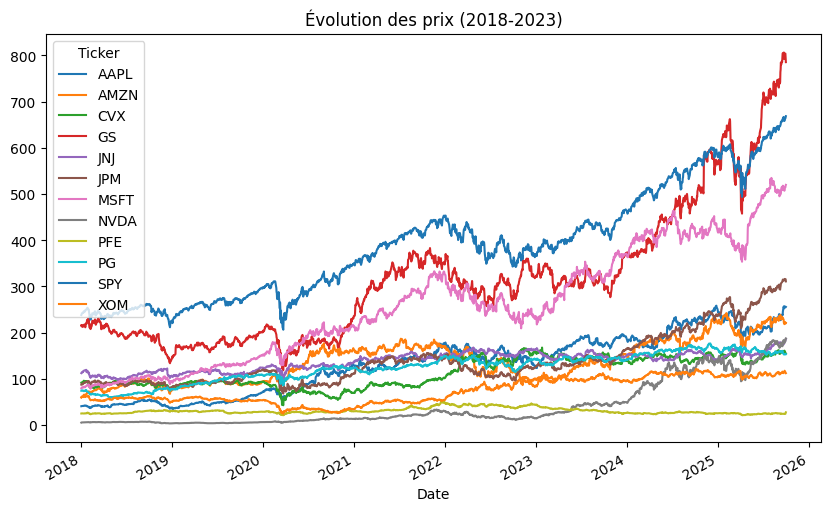

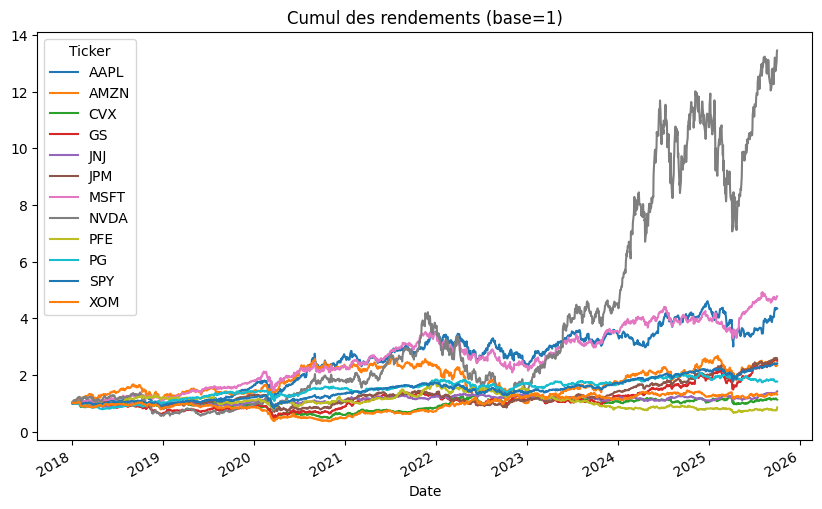